In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print('done')

done


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

print('reading')
df = pd.read_excel(r"C:\Users\Admin\Downloads\globalterrorismdb_0522dist.xlsx")
print('done')

reading
done


In [3]:
df.shape

(209706, 135)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209706 entries, 0 to 209705
Columns: 135 entries, eventid to related
dtypes: datetime64[ns](1), float64(54), int64(23), object(57)
memory usage: 216.0+ MB


In [5]:
df.describe()

,eventid,iyear,imonth,iday,extended,resolution,country,region,latitude,longitude,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,2.097060e+05,209706.000000,209706.000000,209706.000000,209706.000000,4861,209706.000000,209706.000000,205015.000000,205014.000000,...,1.533000e+03,7.340000e+02,9.510000e+02,725.000000,14091.000000,13494.000000,209706.000000,209706.000000,209706.000000,209706.000000
mean,2.004867e+11,2004.800993,6.455285,15.527930,0.051525,2006-12-14 11:22:40.581978880,130.291351,7.279854,23.358696,30.416738,...,2.791526e+06,3.211036e+05,6.204108e+05,182.750345,4.705912,-31.945531,-4.424289,-4.339318,0.086841,-3.850758
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,1970-03-08 00:00:00,4.000000,1.000000,-53.154613,-176.176447,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-100.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.992080e+11,1992.000000,4.000000,8.000000,0.000000,1997-05-22 00:00:00,69.000000,6.000000,11.510046,8.748117,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.012010e+11,2012.000000,6.000000,15.000000,0.000000,2013-04-29 00:00:00,98.000000,8.000000,31.300213,43.746215,...,1.000000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.015123e+11,2015.000000,9.000000,23.000000,0.000000,2016-05-10 00:00:00,160.000000,10.000000,34.557022,68.835918,...,3.420000e+05,0.000000e+00,6.640600e+02,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.020123e+11,2020.000000,12.000000,31.000000,1.000000,2021-05-29 00:00:00,1004.000000,12.000000,74.633553,179.366667,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2958.000000,1.000000,1.000000,1.000000,1.000000
std,1.351933e+09,13.519321,3.387098,8.801104,0.221066,NaN,111.714562,2.905697,18.137061,56.113029,...,2.826923e+07,5.005760e+06,9.195574e+06,2567.718184,2.030311,64.494306,4.543800,4.640302,0.536943,4.677966


# Data Cleaning

In [6]:
# Extracting important columns
df2 = df[['iyear','imonth','iday','country_txt','provstate','region_txt','city','attacktype1_txt','target1',
          'nkill','nwound','summary','gname','targtype1_txt','weaptype1_txt']]
print('done')

done


In [7]:
# Renaming columns for simplicity
df2.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state',
                       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                       'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type'},inplace=True)
print('done')

done


In [8]:
# replacing days and months set to 0 with 1
df2.loc[df2['Month'] == 0, 'Month'] = 1
df2.loc[df2['Day'] == 0, 'Day'] = 1
print('done')

done


In [9]:
# Combine Year, Month, and Day into a single column
df2['Date'] = pd.to_datetime(df2[['Year', 'Month', 'Day']], errors='coerce')
df2.tail()
print('done')

done


In [10]:
# Move 'Date' column to the first position
columns = ['Date'] + [col for col in df2.columns if col != 'Date']
df2 = df2[columns]
print('done')


done


In [11]:
# Removing year, month, day column as they are unnecessary
df2.drop(columns=['Year', 'Month', 'Day'], inplace=True)
print('done')


done


In [12]:
df2.head()

,Date,Country,state,Region,city,AttackType,Target,Killed,Wounded,Summary,Group,Target_type,Weapon_type
0,1970-07-02,Dominican Republic,National,Central America & Caribbean,Santo Domingo,Assassination,Julio Guzman,1.0,0.0,NaN,MANO-D,Private Citizens & Property,Unknown
1,1970-01-01,Mexico,Federal,North America,Mexico city,Hostage Taking (Kidnapping),"Nadine Chaval, daughter",0.0,0.0,NaN,23rd of September Communist League,Government (Diplomatic),Unknown
2,1970-01-01,Philippines,Tarlac,Southeast Asia,Unknown,Assassination,Employee,1.0,0.0,NaN,Unknown,Journalists & Media,Unknown
3,1970-01-01,Greece,Attica,Western Europe,Athens,Bombing/Explosion,U.S. Embassy,NaN,NaN,NaN,Unknown,Government (Diplomatic),Explosives
4,1970-01-01,Japan,Fukouka,East Asia,Fukouka,Facility/Infrastructure Attack,U.S. Consulate,NaN,NaN,NaN,Unknown,Government (Diplomatic),Incendiary


In [13]:
df2.shape

(209706, 13)

In [14]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209706 entries, 0 to 209705
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Date         209706 non-null  datetime64[ns]
 1   Country      209706 non-null  object        
 2   state        209706 non-null  object        
 3   Region       209706 non-null  object        
 4   city         209279 non-null  object        
 5   AttackType   209706 non-null  object        
 6   Target       209069 non-null  object        
 7   Killed       197179 non-null  float64       
 8   Wounded      189770 non-null  float64       
 9   Summary      143586 non-null  object        
 10  Group        209706 non-null  object        
 11  Target_type  209706 non-null  object        
 12  Weapon_type  209706 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(10)
memory usage: 20.8+ MB


In [15]:
df2.describe()

,Date,Killed,Wounded
count,209706,197179.000000,189770.000000
mean,2005-04-17 19:08:18.011501824,2.431030,3.085872
min,1970-01-01 00:00:00,0.000000,0.000000
25%,1992-08-04 00:00:00,0.000000,0.000000
50%,2012-01-03 00:00:00,0.000000,0.000000
75%,2015-12-27 00:00:00,2.000000,2.000000
max,2020-12-31 00:00:00,1700.000000,10878.000000
std,NaN,11.340882,40.916175


In [16]:
# Save the modified DataFrame to a new excel file
output_path = r"C:\Users\Admin\Downloads\modified_imp_data.xlsx"
#df2.to_excel(output_path, index=False)

print(f"Data saved to {output_path}")


Data saved to C:\Users\Admin\Downloads\modified_imp_data.xlsx


# Temporal Analysis (trends over time)


In [ ]:
# Extract year and month for temporal analysis
df2['Year'] = df2['Date'].dt.year
df2['Month'] = df2['Date'].dt.month

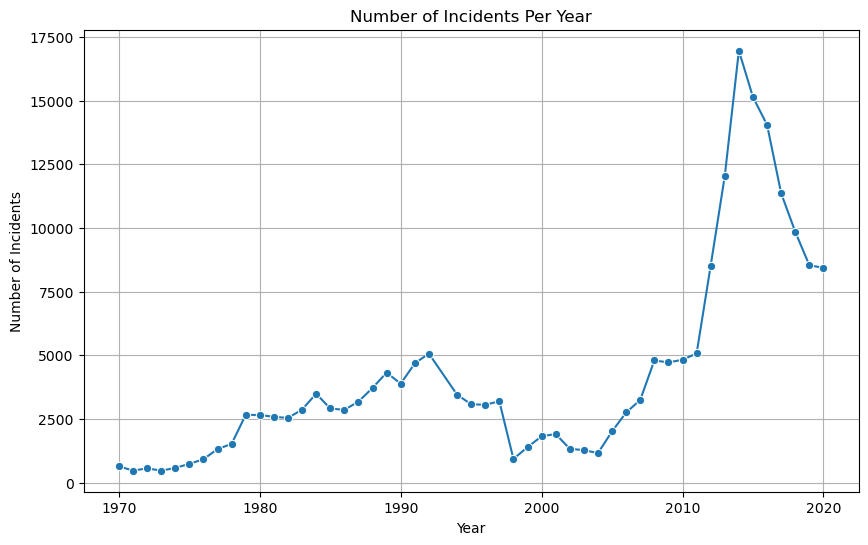

In [71]:
# 1. Plot incidents per year
incidents_per_year = df2.groupby('Year').size()

plt.figure(figsize=(10, 6))
sns.lineplot(x=incidents_per_year.index, y=incidents_per_year.values, marker='o')
plt.title("Number of Incidents Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Incidents")
plt.grid(True)
plt.show()

# conclusion: number of incidents peaked in 2014 and have been decreasing since.

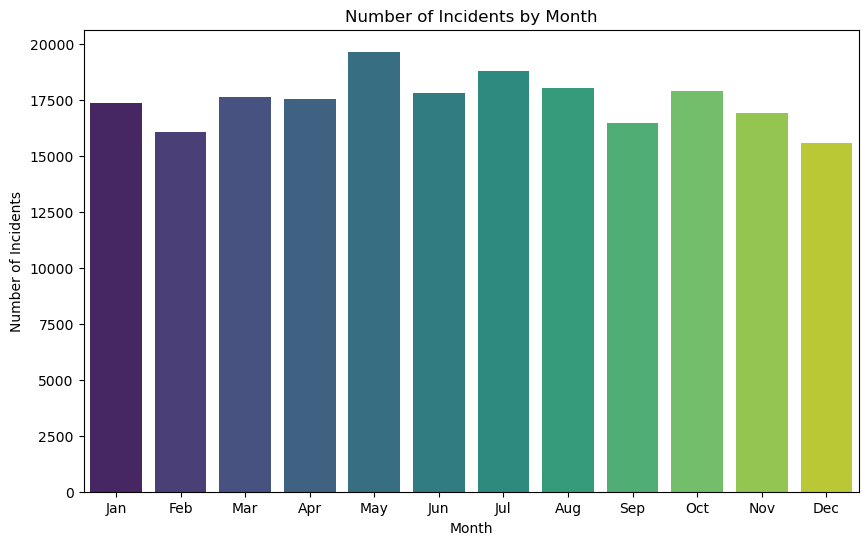

In [73]:
# 2. Plot incidents per month
incidents_per_month = df2.groupby('Month').size()

plt.figure(figsize=(10, 6))
sns.barplot(x=incidents_per_month.index, y=incidents_per_month.values, palette='viridis')
plt.title("Number of Incidents by Month")
plt.xlabel("Month")
plt.ylabel("Number of Incidents")
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

# conclusion: the odds of terrorism occuring in any given month are almost the same as
#             every other month  

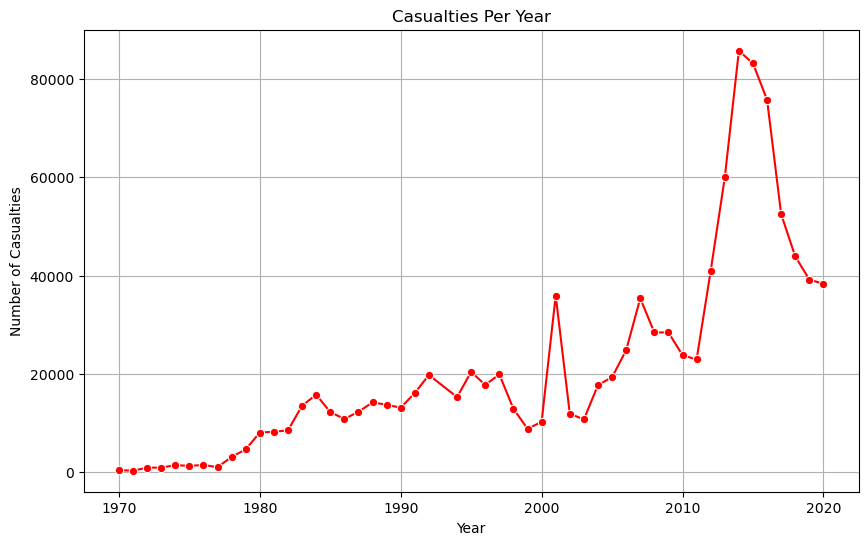

In [75]:
# 3. Casualties (Killed + Wounded) over time
df2['Casualties'] = df2['Killed'].fillna(0) + df2['Wounded'].fillna(0)
casualties_per_year = df2.groupby('Year')['Casualties'].sum()

plt.figure(figsize=(10, 6))
sns.lineplot(x=casualties_per_year.index, y=casualties_per_year.values, marker='o', color='red')
plt.title("Casualties Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Casualties")
plt.grid(True)
plt.show()

# conclusion: casualties peaked in 2014 and have been decreasing since.

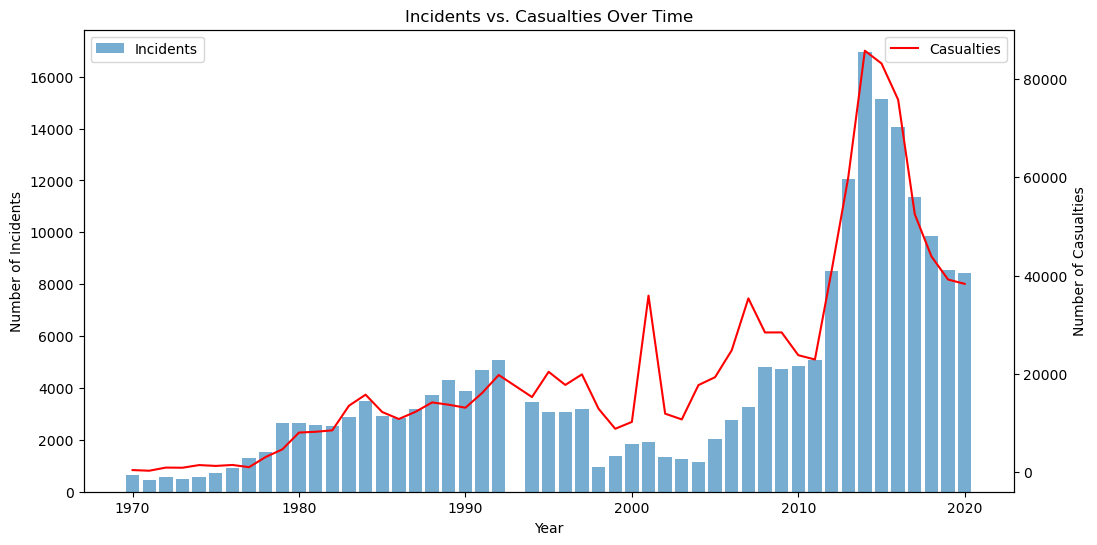

In [77]:
# 4. Compare incidents and casualties over time
fig, ax1 = plt.subplots(figsize=(12, 6))

ax2 = ax1.twinx()
ax1.bar(incidents_per_year.index, incidents_per_year.values, alpha=0.6, label="Incidents")
ax2.plot(casualties_per_year.index, casualties_per_year.values, color='red', label="Casualties")

ax1.set_xlabel("Year")
ax1.set_ylabel("Number of Incidents")
ax2.set_ylabel("Number of Casualties")
ax1.set_title("Incidents vs. Casualties Over Time")
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")
plt.show()

# conclusoin: worst incidents happened in 2001 (911)

# Geographical Analysis

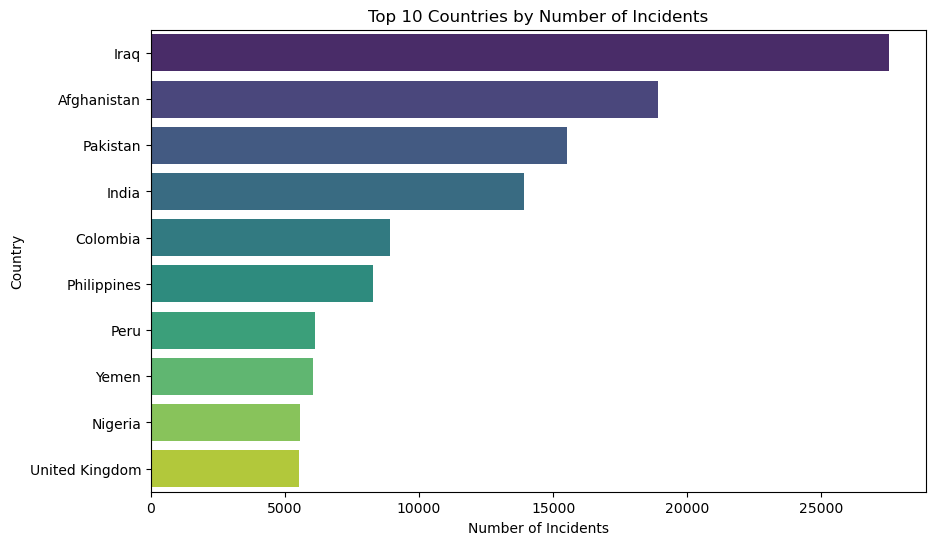

In [172]:
# 1. Top 10 countries by number of incidents
top_countries_incidents = df2['Country'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(y=top_countries_incidents.index, x=top_countries_incidents.values, palette='viridis')
plt.title("Top 10 Countries by Number of Incidents")
plt.xlabel("Number of Incidents")
plt.ylabel("Country")
plt.show()

# conclusion: The country with the highest number of incidents is Iraq.

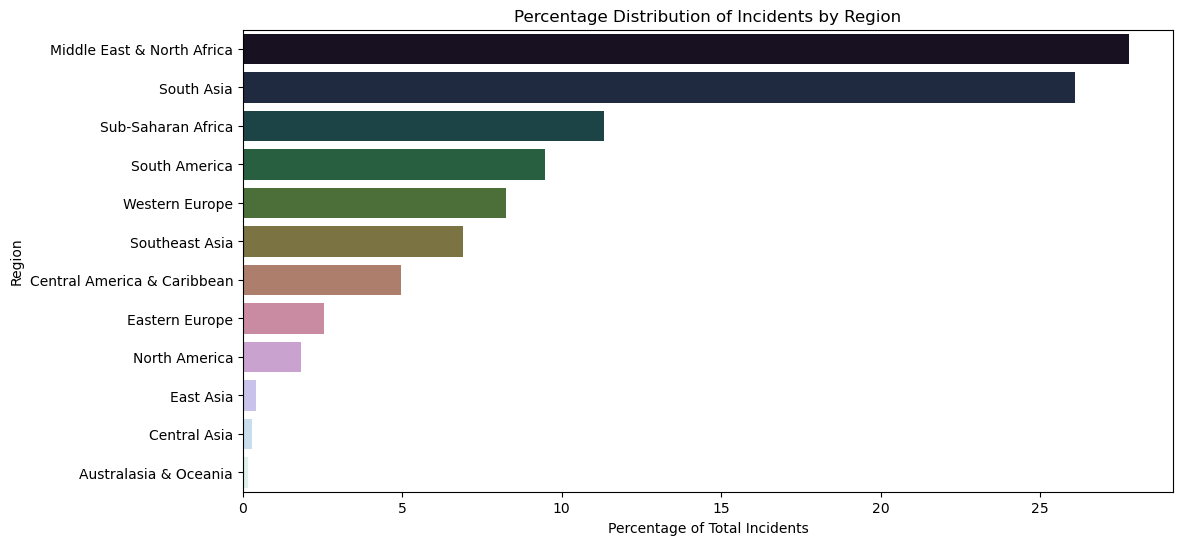

In [181]:
# 2. Regional distribution of incidents
region_distribution = df2['Region'].value_counts(normalize=True) * 100

plt.figure(figsize=(12, 6))
sns.barplot(y=region_distribution.index, x=region_distribution.values, palette='cubehelix')
plt.title("Percentage Distribution of Incidents by Region")
plt.xlabel("Percentage of Total Incidents")
plt.ylabel("Region")
plt.show()

# conclusion: over 28% of incidents have occured in Middle East and North Africa.

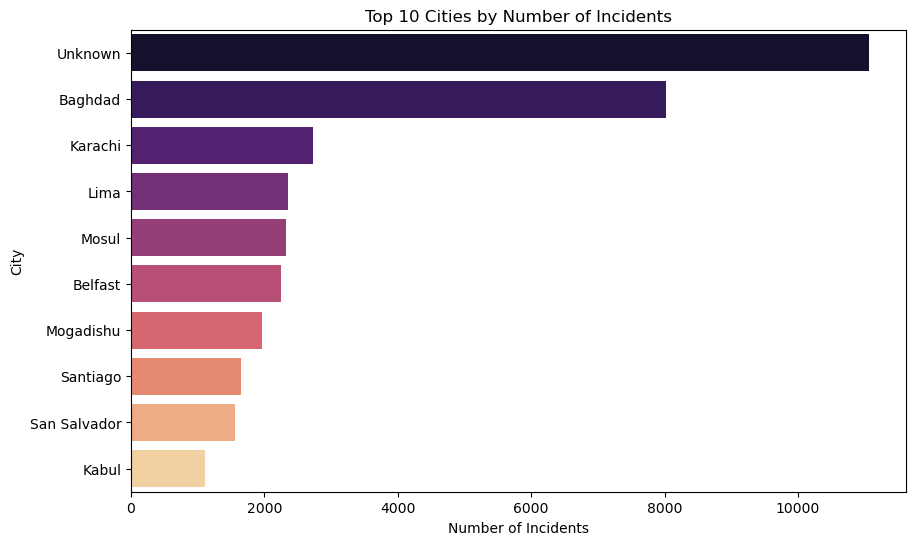

In [177]:
# 3. Top 10 cities by number of incidents
top_cities_incidents = df2['city'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(y=top_cities_incidents.index, x=top_cities_incidents.values, palette='magma')
plt.title("Top 10 Cities by Number of Incidents")
plt.xlabel("Number of Incidents")
plt.ylabel("City")
plt.show()

# conclusion: The most dangerous city is Baghdad with over 8000 incidents in last 50 years.

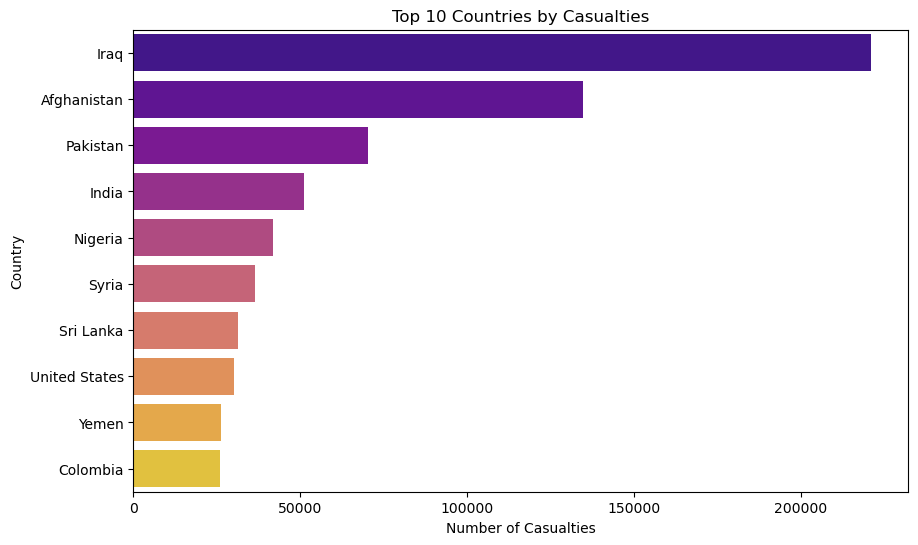

In [92]:
# 4. Top 10 countries by casualties
top_countries_casualties = df2.groupby('Country')['Casualties'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(y=top_countries_casualties.index, x=top_countries_casualties.values, palette='plasma')
plt.title("Top 10 Countries by Casualties")
plt.xlabel("Number of Casualties")
plt.ylabel("Country")
plt.show()

# conclusion: Most number of casualties occured in Iraq which is reflective of the number 
#             of in Iraq.

# Analysis of Attack Characteristics 

In [187]:
# Fill missing values for analysis
df2['AttackType'] = df2['AttackType'].fillna('Unknown')
df2['Target_type'] = df2['Target_type'].fillna('Unknown')
df2['Weapon_type'] = df2['Weapon_type'].fillna('Unknown')

# Total casualties
df2['Casualties'] = df2['Killed'] + df2['Wounded']

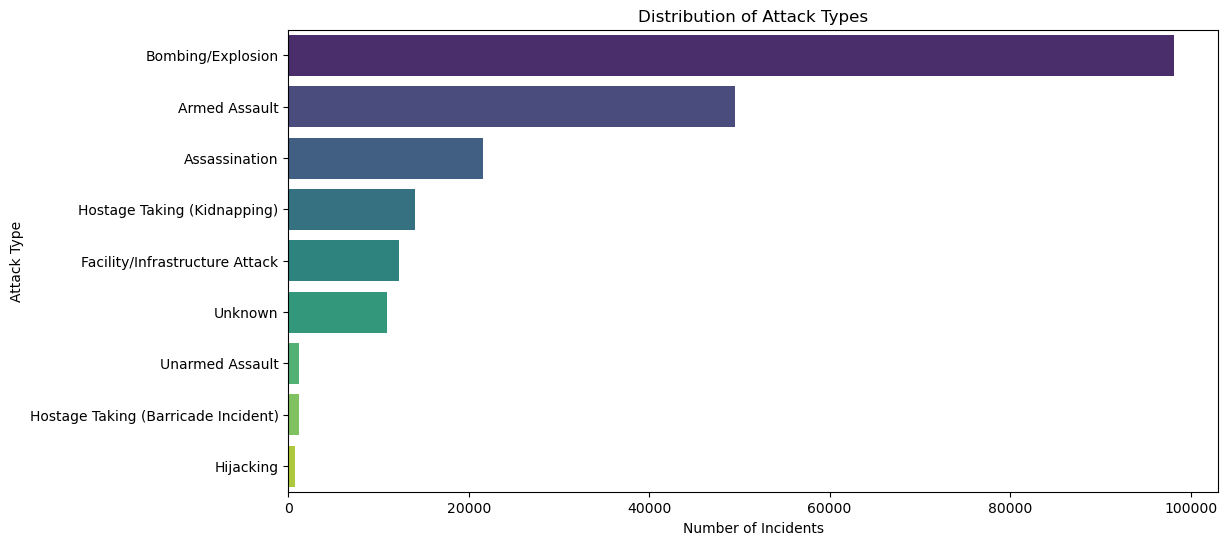

In [189]:
# 1. Distribution of Attack Types
attack_type_counts = df2['AttackType'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(y=attack_type_counts.index, x=attack_type_counts.values, palette='viridis')
plt.title("Distribution of Attack Types")
plt.xlabel("Number of Incidents")
plt.ylabel("Attack Type")
plt.show()

# conclusion: most common attack type is Bombing followed by Armed Assault.

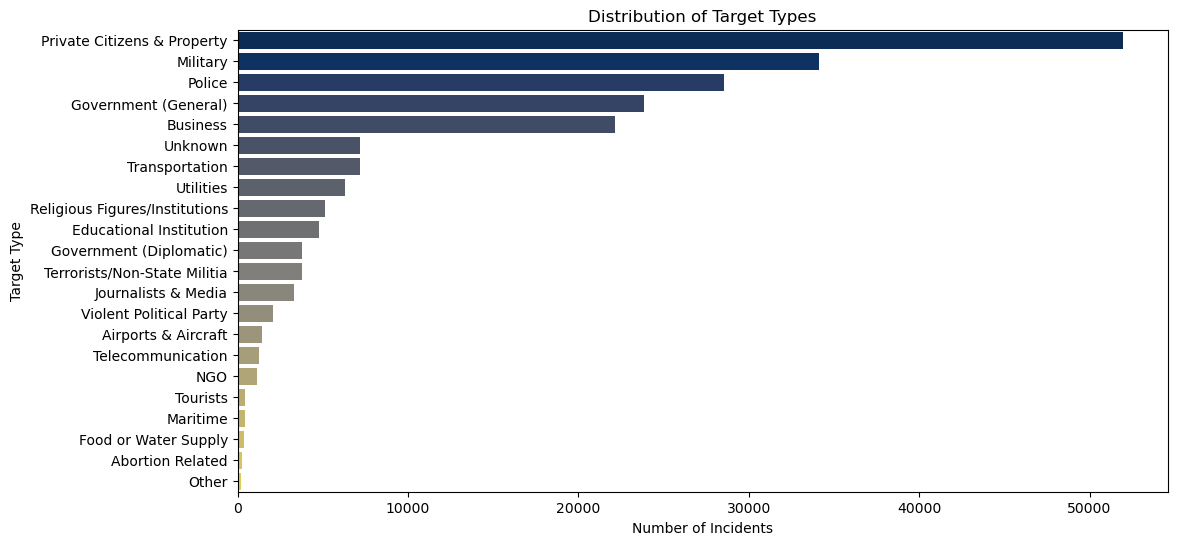

In [190]:
# 2. Distribution of Target Types
target_type_counts = df2['Target_type'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(y=target_type_counts.index, x=target_type_counts.values, palette='cividis')
plt.title("Distribution of Target Types")
plt.xlabel("Number of Incidents")
plt.ylabel("Target Type")
plt.show()

# conclusion: after Private Citizens, Military, Police, Government, and Buisnesses are 
#             most common targets

# Actor Analysis

In [212]:
# Fill missing values
df2['Group'] = df2['Group'].fillna('Unknown')

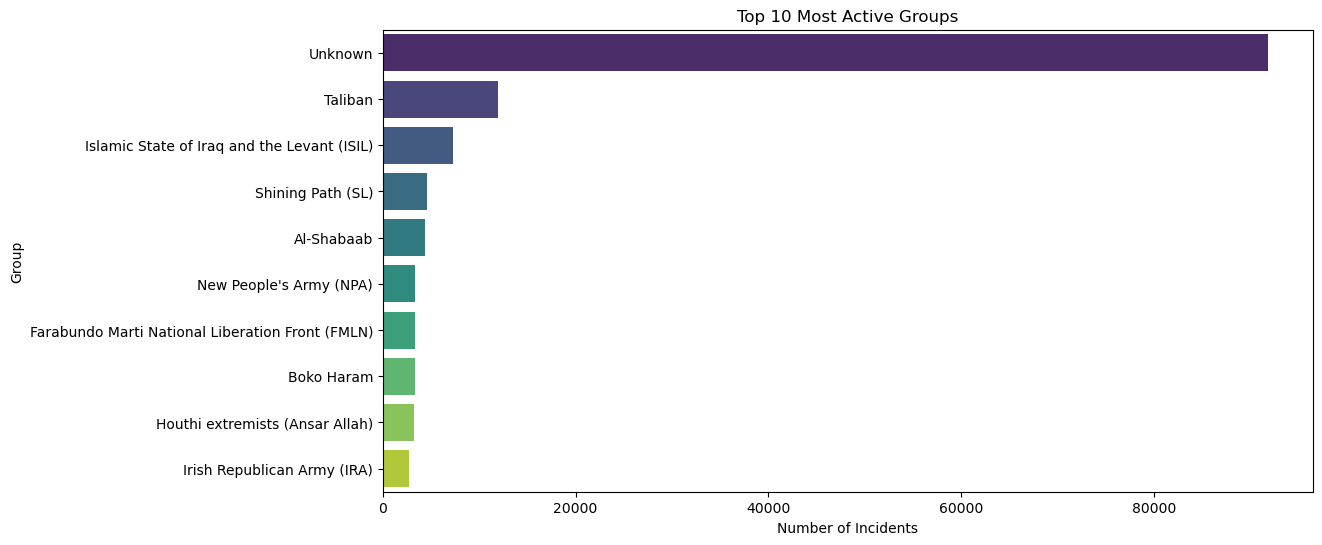

In [214]:
# 1. Most Active Groups
group_counts = df2['Group'].value_counts().head(10)  # Top 10 most active groups

plt.figure(figsize=(12, 6))
sns.barplot(y=group_counts.index, x=group_counts.values, palette='viridis')
plt.title("Top 10 Most Active Groups")
plt.xlabel("Number of Incidents")
plt.ylabel("Group")
plt.show()

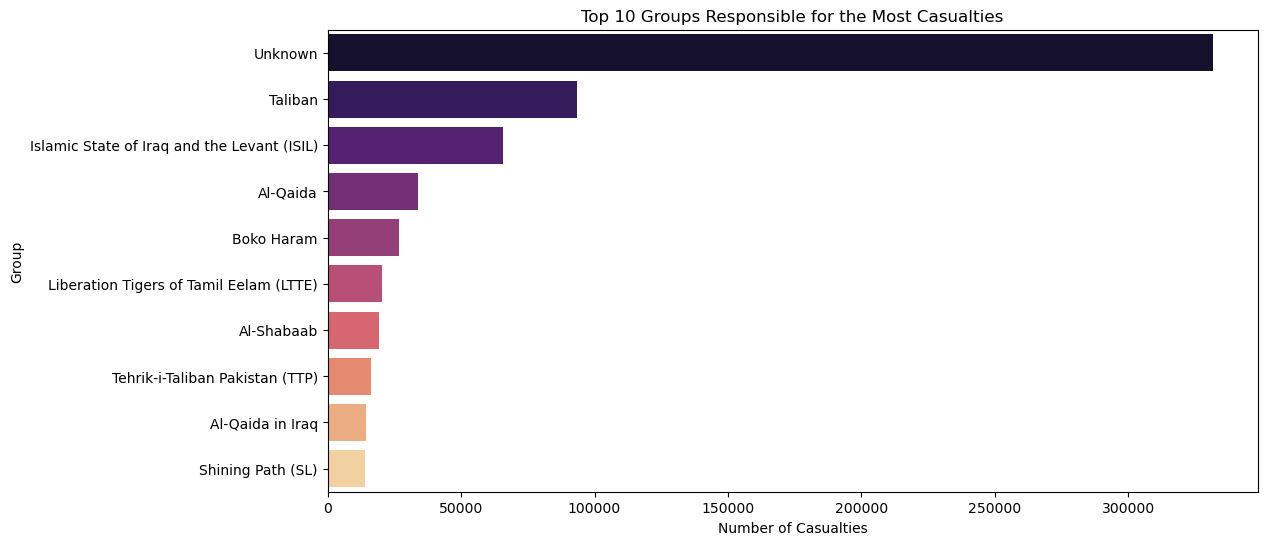

In [216]:
# 2. Groups Responsible for the Most Casualties
group_casualties = df2.groupby('Group')['Casualties'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(y=group_casualties.index, x=group_casualties.values, palette='magma')
plt.title("Top 10 Groups Responsible for the Most Casualties")
plt.xlabel("Number of Casualties")
plt.ylabel("Group")
plt.show()

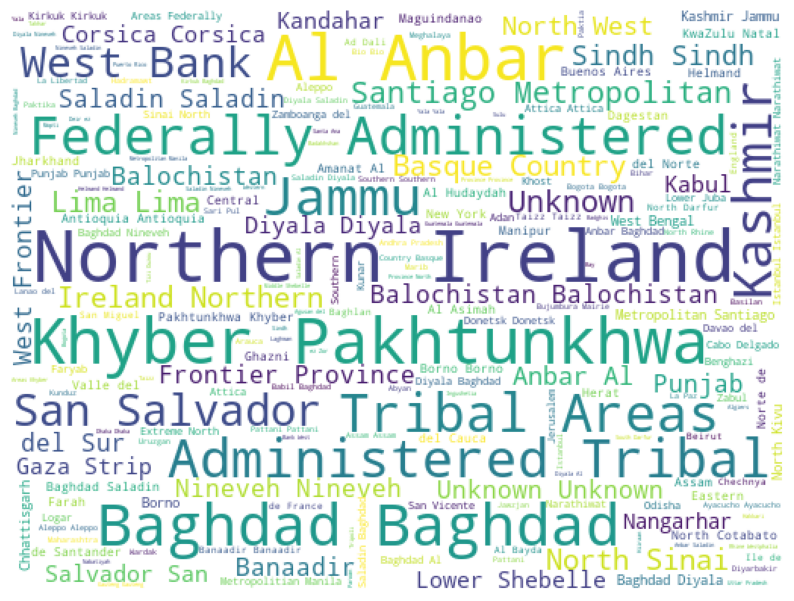

done


In [17]:
from wordcloud import WordCloud
from scipy import signal
cities = df2.state.dropna()
plt.subplots(figsize=(10,10))
wordcloud = WordCloud(background_color = 'white',
                     width = 512,
                     height = 384).generate(' '.join(cities))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()
print('done')

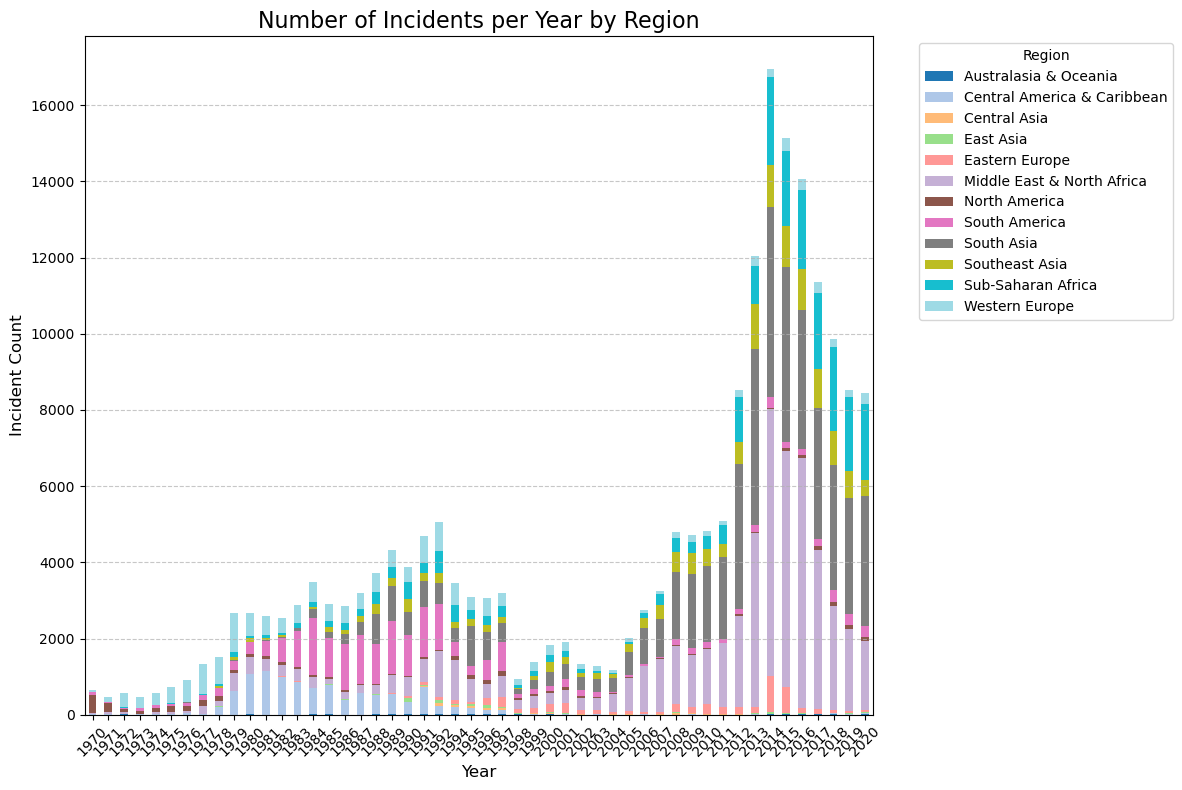

In [24]:
import matplotlib.pyplot as plt

# Group by 'Year' and 'Region', and count the number of incidents
df2['Year'] = pd.to_datetime(df2['Date']).dt.year  # Ensure the Year column is extracted
year_region_counts = df2.groupby(['Year', 'Region']).size().unstack(fill_value=0)

year_region_counts.plot(kind='bar', stacked=True, figsize=(12, 8), cmap='tab20')

plt.title('Number of Incidents per Year by Region', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Incident Count', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


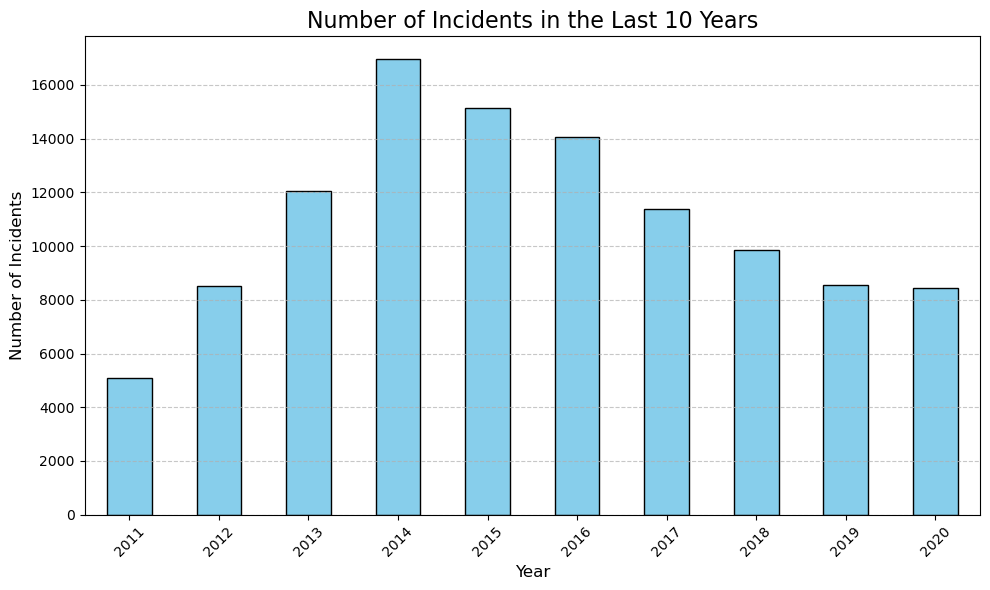

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure the 'Year' column is present
df2['Year'] = pd.to_datetime(df2['Date']).dt.year

# Filter data for the last 10 years
recent_years = df2['Year'].max() - 10  # Calculate the cutoff year
filtered_data = df2[df2['Year'] > recent_years]

# Group by year and count incidents
incidents_last_10_years = filtered_data['Year'].value_counts().sort_index()

# Plot the data
plt.figure(figsize=(10, 6))
incidents_last_10_years.plot(kind='bar', color='skyblue', edgecolor='black')

# Add titles and labels
plt.title('Number of Incidents in the Last 10 Years', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Incidents', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


In [26]:
# Filtering data of last 5 years
last_five_years = df2['Year'].max() - 5
filtered_data = df2[df2['Year'] > last_five_years]

incidents_in_last_5_years = filtered_data.groupby('Country').size().reset_index(name='Total_Incidents')

# Display the result
print(incidents_in_last_5_years.sort_values(by='Total_Incidents', ascending=False).head(10))

                              Country  Total_Incidents
0                         Afghanistan             9218
58                               Iraq             8715
55                              India             3955
142                             Yemen             3215
99                           Pakistan             2720
104                       Philippines             2689
97                            Nigeria             2658
115                           Somalia             2387
125                             Syria             1508
33   Democratic Republic of the Congo             1035


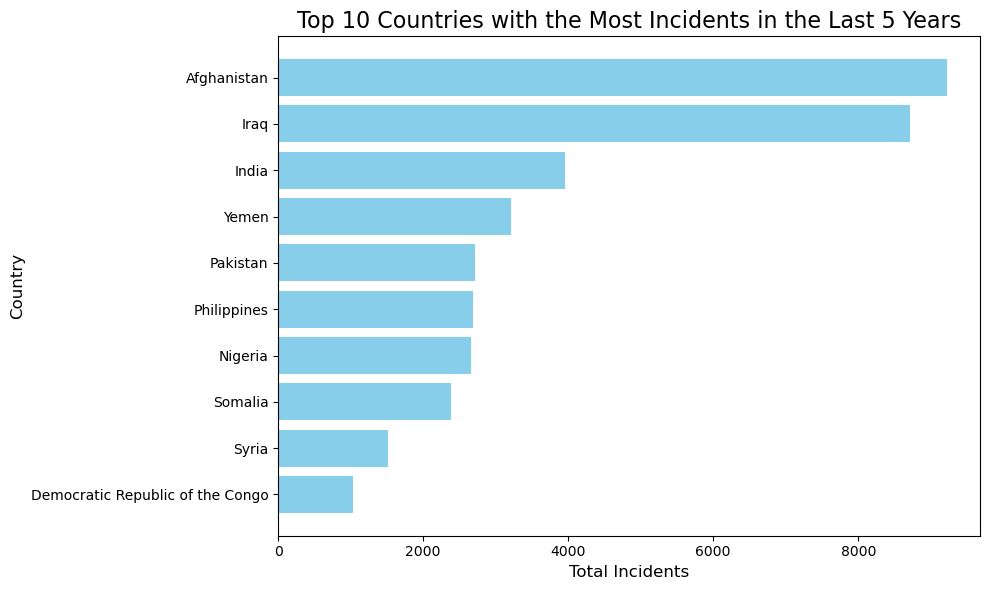

In [27]:
top_10_incidents = incidents_in_last_5_years.sort_values(by='Total_Incidents', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_10_incidents['Country'], top_10_incidents['Total_Incidents'], color='skyblue')

plt.title('Top 10 Countries with the Most Incidents in the Last 5 Years', fontsize=16)
plt.xlabel('Total Incidents', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.gca().invert_yaxis()  

plt.tight_layout()
plt.show()


In [28]:
# Counting incidents per country in last 5 years
countries = filtered_data['Country'].value_counts().reset_index()
countries.columns = ['Country', 'Count']

# Cretnig choropleth map for visualization
fig = px.choropleth(
    country_counts_last_5_years,
    locations="Country",
    locationmode="country names",
    color="Count",
    title="Number of Incidents per Country in the Last 5 Years",
    color_continuous_scale="Oranges",
)

fig.show()

NameError: name 'country_counts_last_5_years' is not defined

In [ ]:
incidents_per_city = df2.groupby('city').size().reset_index(name='Total_Incidents')

top_10_cities = incidents_per_city.sort_values(by='Total_Incidents', ascending=False).head(10)

print(top_10_cities)

In [ ]:
# Plotting a bar chart for the top 10 cities with the most terrorism
top_10_cities = incidents_per_city.sort_values(by='Total_Incidents', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_10_cities['city'], top_10_cities['Total_Incidents'], color='lightcoral')

plt.title('Top 10 Cities with the Most Incidents', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('Total Incidents', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.gca().invert_yaxis()  

plt.tight_layout()
plt.show()


In [ ]:
incidents_per_region = df2.groupby('Region').size().reset_index(name='Total_Incidents')

incidents_per_region.sort_values(by='Total_Incidents', ascending=False)


In [ ]:
# Plotting a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_10_regions['Region'], top_10_regions['Total_Incidents'], color='skyblue')
plt.xlabel('Total Incidents')
plt.title('Top 10 Regions with the Most Incidents')
plt.gca().invert_yaxis()  
plt.show()


In [ ]:
import matplotlib.pyplot as plt

region_counts = df2['Region'].value_counts()

threshold = 5000

# Group regions with fewer than 5000 incidents into "Other"
region_counts_filtered = region_counts[region_counts >= threshold]
other_count = region_counts[region_counts < threshold].sum()

region_counts_filtered['Other'] = other_count

region_counts_filtered.plot(kind='pie', figsize=(8, 8), autopct='%1.1f%%', startangle=90, cmap='tab20')

plt.title('Proportion of Incidents by Region', fontsize=16)
plt.ylabel('') 

plt.tight_layout()
plt.show()
